In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **The dataset is shown below:**

In [110]:
data_df = pd.read_csv('../data/CreditPrediction.csv')
df_filled = data_df.fillna(0)
df_encoded = pd.get_dummies(df_filled, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True, )
df_encoded

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45.0,3,39.0,5.0,1,3,12691.0,777,1.335,...,False,False,True,False,False,False,True,False,False,False
1,818770008,49.0,5,44.0,6.0,1,2,8256.0,864,1.541,...,False,False,False,False,True,False,True,False,False,False
2,713982108,51.0,3,36.0,4.0,1,0,3418.0,0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,769911858,40.0,4,34.0,3.0,4,1,3313.0,2517,1.405,...,False,False,False,False,True,False,True,False,False,False
4,709106358,40.0,3,21.0,5.0,1,0,4716.0,0,2.175,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,718673358,35.0,3,30.0,5.0,3,4,13590.0,1528,0.728,...,False,False,False,True,False,False,True,False,False,False
10163,715207458,46.0,1,39.0,2.0,2,1,2029.0,1074,0.514,...,False,False,False,False,True,False,True,False,False,False
10164,803665983,52.0,0,46.0,3.0,2,4,2742.0,2184,0.592,...,False,False,True,False,False,False,True,False,False,False
10165,713183508,39.0,1,36.0,1.0,3,2,2751.0,1158,0.821,...,False,False,False,False,False,True,False,False,False,False


In [111]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

X = df_encoded.drop('Credit_Limit', axis=1)
y = df_encoded['Credit_Limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Feature 0: 0.000000
Feature 1: 0.016889
Feature 2: 0.002292
Feature 3: 0.000000
Feature 4: 0.007384
Feature 5: 0.014086
Feature 6: 0.000000
Feature 7: 0.126143
Feature 8: 0.020300
Feature 9: 0.117480
Feature 10: 0.066868
Feature 11: 0.001394
Feature 12: 0.772730
Feature 13: 0.000000
Feature 14: 0.111769
Feature 15: 0.112587
Feature 16: 0.000000
Feature 17: 0.002473
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.003068
Feature 21: 0.004727
Feature 22: 0.001539
Feature 23: 0.000000
Feature 24: 0.007824
Feature 25: 0.004099
Feature 26: 0.031166
Feature 27: 0.008769
Feature 28: 0.056872
Feature 29: 0.138150
Feature 30: 0.010405
Feature 31: 0.048045
Feature 32: 0.021816
Feature 33: 0.004321
Feature 34: 0.067747
12


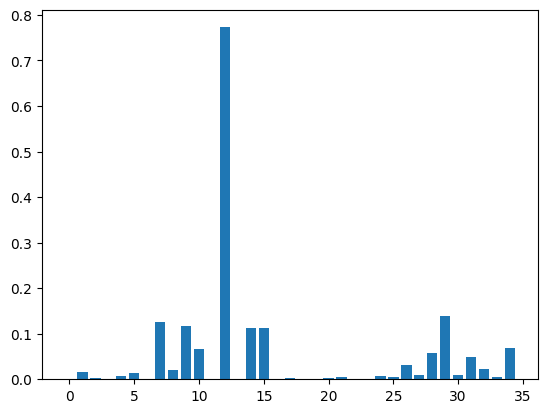

In [125]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_regression, k=25)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# load the dataset
# split into train and test sets
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
ignr_cnt = 0
for i in range(len(fs.scores_)):
 if (fs.scores_[i] < 0.0025):
  ignr_cnt +=1
 print('Feature %d: %f' % (i, fs.scores_[i]))
print(ignr_cnt)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [126]:
X_train_fs.shape

(6811, 25)